In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 设置参数
sc.settings.verbosity = 4
sc.settings.set_figure_params(
    dpi=80,
    dpi_save=300,
    facecolor="white",
    frameon=False,  # remove frame
)

 8.聚类
- 8.1 读取去批次后的数据
- 8.2 降维
- 8.3 邻域图
- 8.4 莱顿聚类
- 8.4.1 不同分辨率的莱顿聚类
- 8.4.2 莱顿聚类可视化
- 8.4.3 选择想要的分辨率，刚好注释到想要的细胞类型？
- 8.4.4 page(可选)
- 8.5 保存
------------------------------------------------------
- 一般归一化后是特征选择，降维，聚类
- 去批次相当于完全完成了特征选择，降维
- 去批次的聚类只是为了可视化批次效应，比较粗糙
- 所以还是要专门精细的聚类

In [3]:
## 8.1 读取去批次后的数据
adata = sc.read("anndata_batch.h5ad")

In [4]:
## 8.2 降维
## 见7.4

In [5]:
## 8.3 邻域图

sc.pp.neighbors(adata, use_rep="X_scVI",n_neighbors=10, random_state=123)

computing neighbors
        initialized `.distances` `.connectivities` 
    computing neighbors


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-10-25 13:44:07.343826: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-25 13:44:07.345576: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-25 13:44:07.389246: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the

    computed neighbors (0:00:19)
    computed connectivities (0:00:02)
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:21)


In [6]:
## 8.4 莱顿聚类
"""leiden clustering
   - 莱顿聚类直接对单元的邻域图进行聚类
"""
sc.tl.leiden(adata,random_state=123) #默认值resolution=1.0

running Leiden clustering
    finished: found 25 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:04)


In [7]:
## 8.4.1 不同分辨率的莱顿聚类
# 三种不同的分辨率，越大分的越细
sc.tl.leiden(adata, key_added="leiden_0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_0_5", resolution=0.5)
sc.tl.leiden(adata, key_added="leiden_2", resolution=2.0)

running Leiden clustering
    finished: found 11 clusters and added
    'leiden_0_25', the cluster labels (adata.obs, categorical) (0:00:03)
running Leiden clustering
    finished: found 14 clusters and added
    'leiden_0_5', the cluster labels (adata.obs, categorical) (0:00:04)
running Leiden clustering
    finished: found 45 clusters and added
    'leiden_2', the cluster labels (adata.obs, categorical) (0:00:05)


/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:12

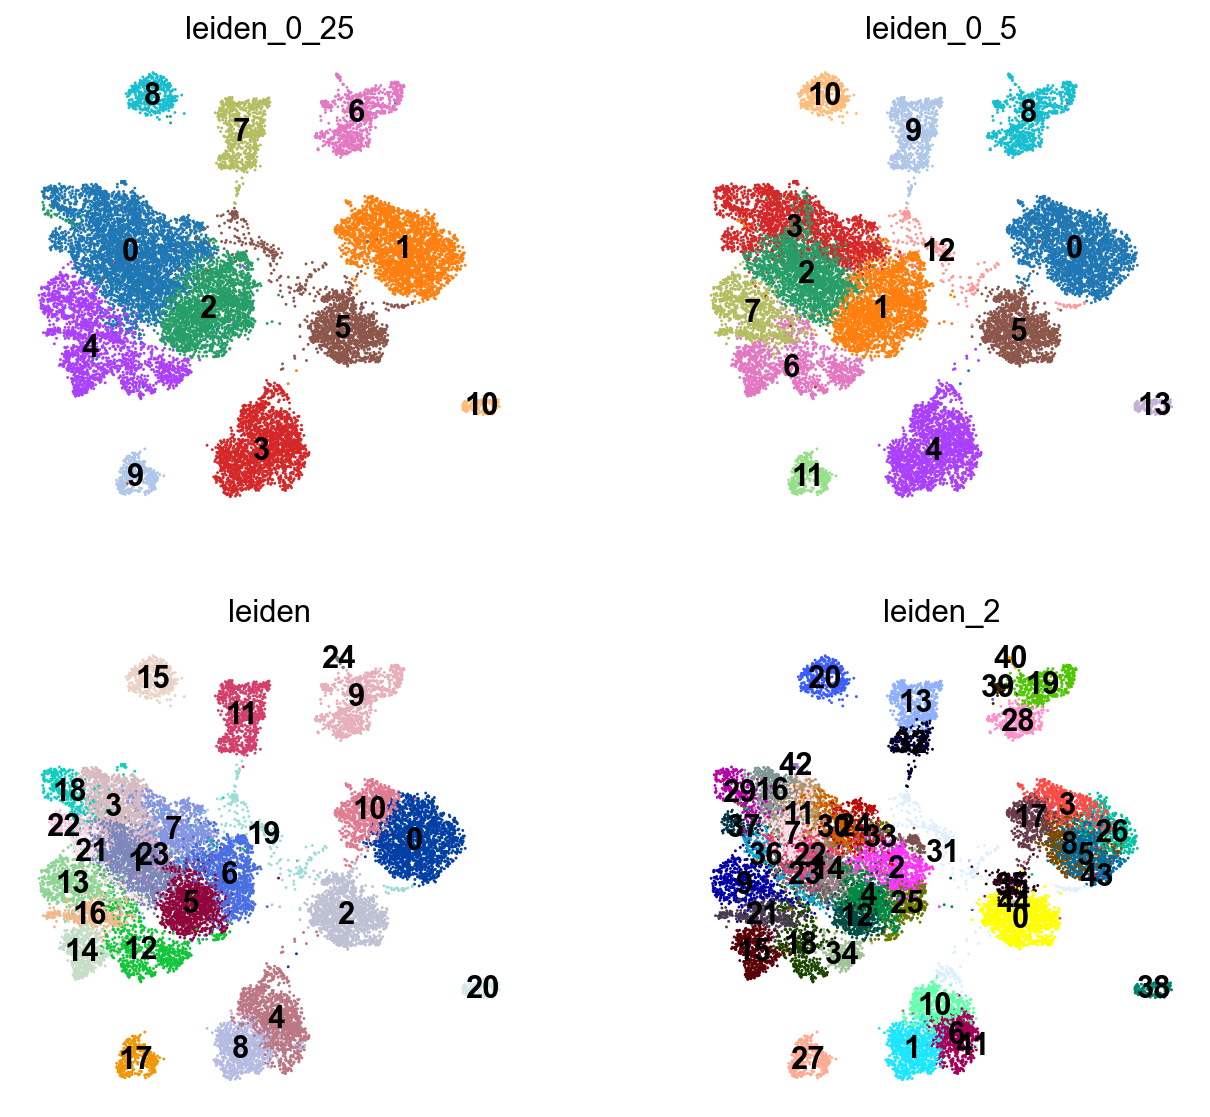

In [8]:
## 8.4.2 莱顿聚类可视化
sc.pl.umap(
    adata,
    color=["leiden_0_25", "leiden_0_5", "leiden","leiden_2"],
    legend_loc="on data",
    ncols = 2,
    save= "-8.4.2.pdf"
    
)

/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/fanxi/mambaforge/envs/lang/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:12

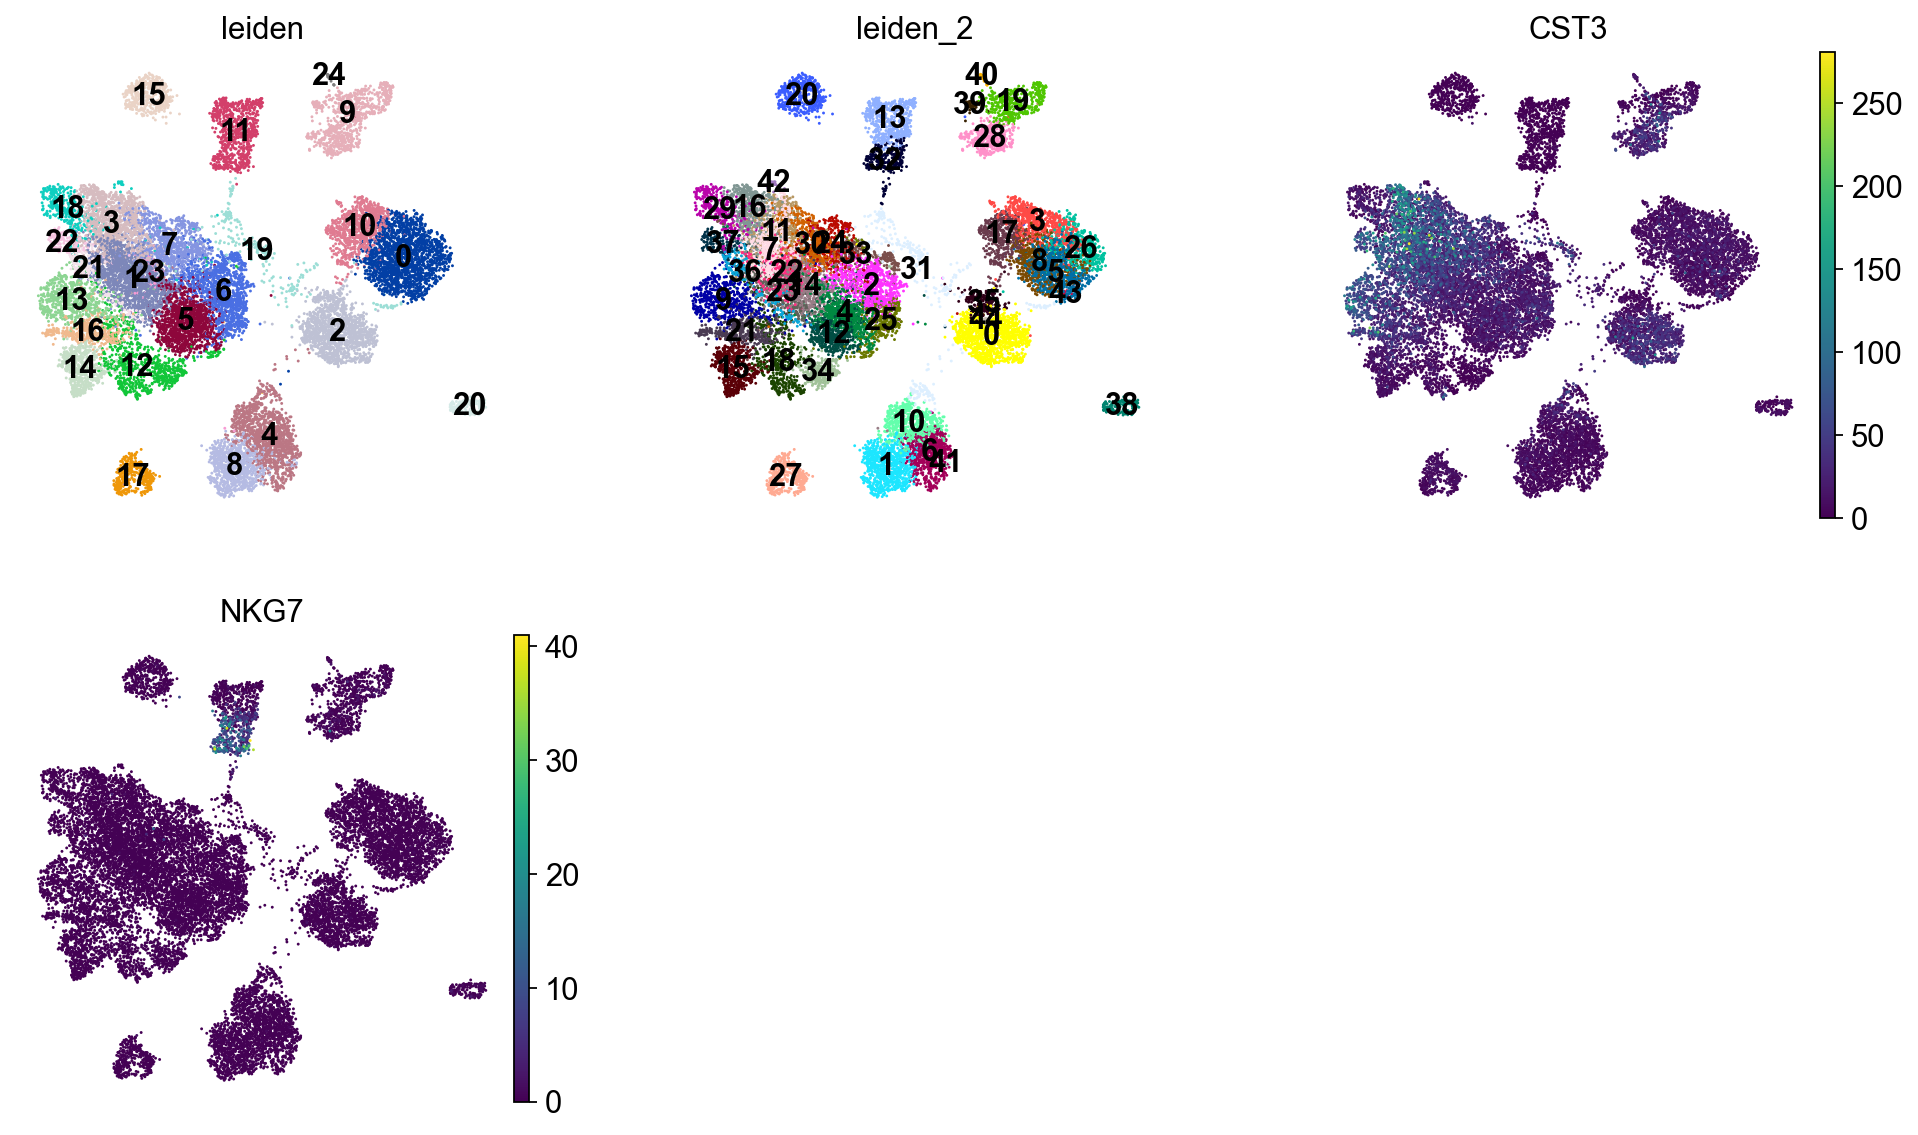

In [9]:
## 8.4.3 选择想要的分辨率，刚好注释到想要的细胞类型？
"""探索性选择分辨率,比如我刚好要注释出某个独立的亚群"""
sc.pl.umap(
    adata, 
    color=["leiden","leiden_2", "CST3", "NKG7", ],
    legend_loc="on data",
    use_raw=True, # 默认True就用的是adata.raw.X绘制
    ncols = 3,
    save = "-8.4.3.pdf"
) #

In [10]:
## 8.4.4 page（可选）
## 断开连接的集群可用paga修复
# sc.tl.leiden(adata_batch,random_state=123) # paga需要先用leiden聚类,或者指定标签groups
# sc.tl.paga(adata_batch)
# sc.pl.paga(adata_batch, plot=True)  # plot coarse-grained graph
# sc.tl.umap(adata_batch, init_pos="paga") 

# sc.pl.umap(
#     adata_batch,
#     color=["leiden","condition","sample"],
#     legend_loc="on data",
# )

In [11]:
## 8.5 保存
adata.write("anndata_cluster.h5ad", compression="gzip") # type: ignore